## Parte 3 del ejercicio 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import csv
from random import random

%matplotlib inline
rcParams['figure.figsize'] = (10,10)

In [7]:
#Funcion que grafica una caja con puntos aeatorios

def caja_aleatoria(lado, Npuntos):
    #Coordenadas de los puntos
    X, Y = [lado * np.random.random() for i in range(Npuntos)], [lado * np.random.random() for i in range(Npuntos)]
    
    #Nos regresa los valores de las coordenadas de los puntos
    return X, Y

In [52]:
#Esta funcion genera los valores de bins para la distancia de puntos en una muestra

def hist_bins(Nbins, coord): #Numero de bins, coordenadas de puntos
    X, Y = coord
    
    #Calculamos todas las distancias
    n = len(X)
    dist = [0 for i in range(int(n*(n-1)/2))]
    k = 0
    for i in range(n-1):
        for j in range(i+1, n):
            dist[k] = (np.sqrt((X[j]-X[i])**2 + (Y[j]-Y[i])**2))
            k += 1
    
    bins_val, bins_edges = np.histogram(dist, bins = Nbins) #Calculamos el histograma de las distancias 
    return dist, bins_val, bins_edges #Devolvemos el valor de los bins solamente

In [53]:
#Funcion que devuelve valores de bins para distancia entre puntos aleatorios y de los datos

def hist_DR(Nbins, coord_random, coord_data): #Numero de bins, coord. de puntos aleatorios, coord. de puntos de datos
    Xr, Yr = coord_random #Coordenadas de aleatorios
    Xd, Yd = coord_data #Coord. de datos
    
    Nr = len(Xr) #Numero de puntos aleatorios
    Nd = len(Xd) #Numero de datos
    dist = [0 for i in range(Nd*Nr)]
    k = 0
    #Calculamos distancias
    for i in range(Nr):
        for j in range(Nd):
            dist[k] = (np.sqrt((Xd[j]-Xr[i])**2 + (Yd[j]-Yr[i])**2))
            k += 1
            
    DR = np.histogram(dist, bins = Nbins)
    return DR[0]

In [26]:
#Peebles-Hauser
def estimador_PH(DD, RR):
    return DD/RR - 1

In [27]:
#Davis-Peebles
def estimador_DP(DD, DR):
    return DD/DR - 1

In [28]:
#Hamilton
def estimador_H(DD, RR, DR):
    return DD*RR/DR**2

In [29]:
#Landy-Szalay
def estimador_LZ(DD, RR, DR):
    est = (DD + RR - 2*DR)/RR
    return est

### Malla

In [57]:
#Obtenemos datos de la malla
with open("malla.txt", "r") as malla:
    reader = csv.reader(malla, delimiter = "\t")
    coord_malla = list(zip(*reader))

#Convertimos datos a enteros
coord_malla[0] = list(map(int, coord_malla[0]))
coord_malla[1] = list(map(int, coord_malla[1]))

In [82]:
Npuntos = len(xmalla)
lado = 1000
Nbins = 250

#Creamos muestra aleatoria
coord_random = caja_aleatoria(lado, Npuntos)

In [84]:
dist_rndm, RR, bins_coord = hist_bins(Nbins, coord_random)
dist_malla, DD_malla, bins_coord = hist_bins(Nbins, coord_malla)
DR_malla = hist_DR(Nbins, coord_random, coord_malla)

bins_coord = bins_coord[:-1]

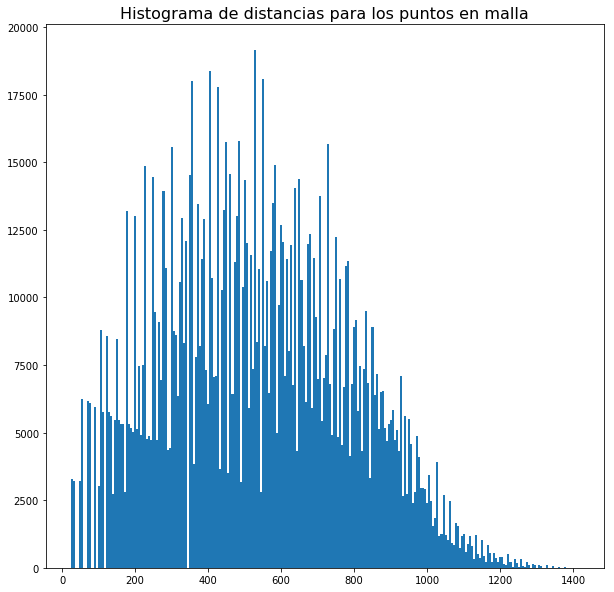

In [88]:
plt.hist(dist_malla, bins = Nbins);
plt.title("Histograma de distancias para los puntos en malla", fontsize = 16);

In [85]:
#Calculamos los estimadores
PH_malla = estimador_PH(DD_malla, RR)
DP_malla = estimador_DP(DD_malla, DR_malla)
H_malla = estimador_H(DD_malla, RR, DR_malla)
LZ_malla = estimador_LZ(DD_malla, RR, DR_malla)

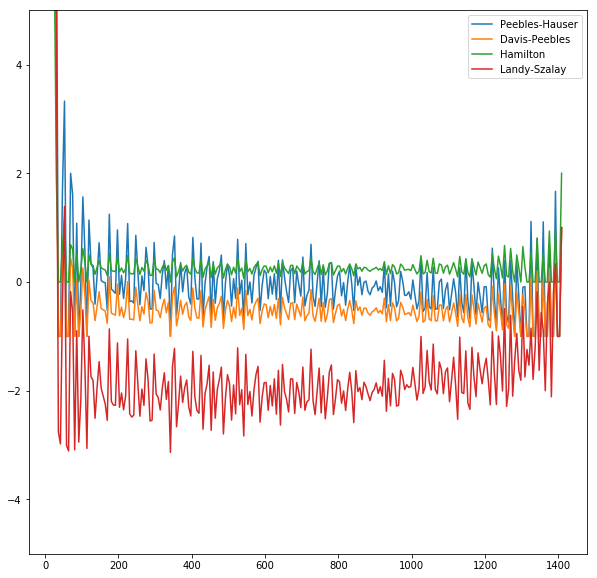

In [92]:
#Graficamos los estimadores
plt.plot(bins_coord, PH_malla, label = "Peebles-Hauser")
plt.plot(bins_coord, DP_malla, label = "Davis-Peebles")
plt.plot(bins_coord, H_malla, label = "Hamilton")
plt.plot(bins_coord, LZ_malla, label = "Landy-Szalay")
plt.legend()
plt.ylim(-5,5);